#Basics of Neural Networks


## History and Intuition Behind Neural Networks


Neural Networks, inspired by the biological neural networks of our brain, were introduced as an attempt to simulate the behavior of the brain — to recognize patterns, interpret sensory data, and make decisions.

Historically, the concept can be traced back to the 1940s and 1950s with the introduction of the Perceptron model. The idea was to mimic a neuron's behavior: receiving input, processing it, and producing an output.

## Feedforward Neural Networks


Feedforward Neural Networks (FNNs) are the simplest type of artificial neural network architecture. In an FNN, the data flows in one direction — from the input layer, through the hidden layers, to the output layer. There are no loops in the network, meaning no cycles or backpropagation of data.



## Backpropagation

Backpropagation, or "backward propagation of errors," is a supervised learning algorithm used for training FNNs. It adjusts the weights of the neurons by calculating the gradient of the loss function concerning each weight. This is achieved using the chain rule of calculus.

## Neural Network Architectures


### Single Layer Perceptron (SLP)
SLPs are the most basic form of a neural network. They consist of a single layer that connects inputs to outputs. However, SLPs are limited in their capabilities and can only solve linearly separable problems.

### Multi-Layer Perceptron (MLP)
MLPs, also known as Deep Feedforward Neural Networks, contain more than one layer of neurons, typically comprising an input layer, several hidden layers, and an output layer. MLPs can solve more complex problems than SLPs, including non-linear problems.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple MLP architecture
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Sample data (for demonstration purposes)
X = torch.rand((100, 10))  # 100 samples, 10 features each
y = torch.randint(0, 2, (100,))  # Binary labels

# Model, Loss, Optimizer
model = MLP(input_dim=10, hidden_dim=20, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")


Epoch 1/10 - Loss: 0.7408
Epoch 2/10 - Loss: 0.7379
Epoch 3/10 - Loss: 0.7351
Epoch 4/10 - Loss: 0.7324
Epoch 5/10 - Loss: 0.7298
Epoch 6/10 - Loss: 0.7273
Epoch 7/10 - Loss: 0.7249
Epoch 8/10 - Loss: 0.7226
Epoch 9/10 - Loss: 0.7203
Epoch 10/10 - Loss: 0.7182


### Dataset Split: Training and Validation
To evaluate the performance of our neural network, it's a good practice to split the dataset into training and validation sets. The training set is used to train the model, while the validation set is used to evaluate its performance during training.



In [2]:
from torch.utils.data import DataLoader, random_split, TensorDataset

# Create a TensorDataset from our data
dataset = TensorDataset(X, y)

# Split the dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


### Model Evaluation
To understand how well our model is doing during training, we evaluate it on the validation set at the end of each epoch and record the accuracy.



In [3]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Update our training loop to include evaluation
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())
    val_acc = evaluate(model, val_loader)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}, Val Accuracy: {val_acc:.4f}")


Epoch 1/10 - Loss: 0.7336, Val Accuracy: 0.4500
Epoch 2/10 - Loss: 0.7136, Val Accuracy: 0.4500
Epoch 3/10 - Loss: 0.6591, Val Accuracy: 0.4500
Epoch 4/10 - Loss: 0.6870, Val Accuracy: 0.4500
Epoch 5/10 - Loss: 0.6971, Val Accuracy: 0.5000
Epoch 6/10 - Loss: 0.6749, Val Accuracy: 0.4500
Epoch 7/10 - Loss: 0.6714, Val Accuracy: 0.5000
Epoch 8/10 - Loss: 0.6652, Val Accuracy: 0.6000
Epoch 9/10 - Loss: 0.6890, Val Accuracy: 0.6500
Epoch 10/10 - Loss: 0.6480, Val Accuracy: 0.6000


### Visualization
We can visualize the training process to understand the model's performance over time.



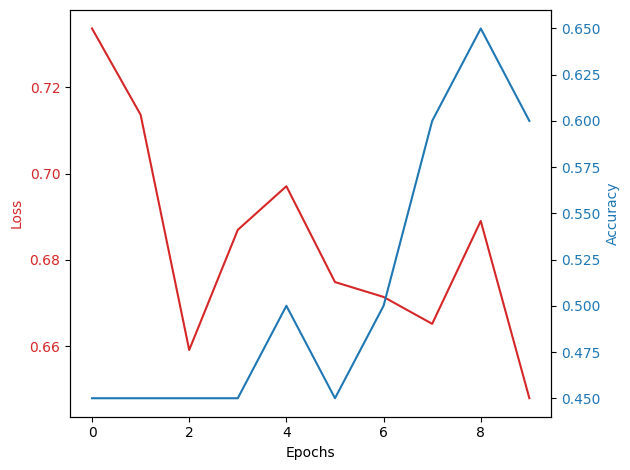

In [4]:
import matplotlib.pyplot as plt

# Plot training loss and validation accuracy
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(epochs), train_losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(epochs), val_accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
